In [2]:
vehicle age,is esc, is_tpms, is adjustable steering, steering type, is parking camera, rare breaks type, turning radius, length and width, is fron fog lights,  rare window wiper, 



SyntaxError: invalid syntax (3887949755.py, line 1)

In [45]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np

In [46]:
dataset_path = kagglehub.dataset_download("litvinenko630/insurance-claims")
df = pd.read_csv(f"{dataset_path}/Insurance claims data.csv")

In [110]:
safety_features = df[["is_esc","is_adjustable_steering","is_tpms","is_parking_sensors","is_parking_camera","rear_brakes_type","steering_type","turning_radius","is_front_fog_lights","is_rear_window_wiper","is_rear_window_washer","is_rear_window_defogger","is_brake_assist","is_power_door_locks","is_central_locking","is_power_steering","is_driver_seat_height_adjustable","is_day_night_rear_view_mirror","is_ecw","is_speed_alert","ncap_rating","claim_status"]]
safety_features.head()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,is_front_fog_lights,is_rear_window_wiper,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,No,Yes,No,Yes,Yes,Drum,Electric,4.9,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,Yes,Yes,Yes,Yes,Yes,Disc,Power,5.2,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,No,No,No,Yes,No,Drum,Power,4.6,No,No,...,No,No,No,Yes,No,No,No,Yes,0,0
4,No,Yes,No,Yes,No,Drum,Electric,5.0,No,No,...,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0


In [111]:
cat = safety_features.select_dtypes(exclude= "number")
num = safety_features.select_dtypes(include= "number")

In [112]:


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## I want to convert al categorical data to a more numerical coded data, because when we try to analize all of the columns to get an instight, it will be more comfortable working with all the data converted into numerical

In [113]:
from sklearn.preprocessing import LabelEncoder

# Simple encoding - same number of columns as original
safety_features_encoded = safety_features.copy()

# Apply LabelEncoder to categorical columns only
for col in cat.columns:
    le = LabelEncoder()
    safety_features_encoded[col] = le.fit_transform(safety_features_encoded[col])



In [114]:
safety_features_encoded.corr()

,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,steering_type,turning_radius,is_front_fog_lights,is_rear_window_wiper,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
is_esc,1.000000,0.517896,0.828793,0.139016,0.845105,-0.828793,0.276548,0.788425,0.549875,0.943207,...,0.613068,0.417517,0.417517,0.098215,0.569611,-0.225575,0.417517,-0.116688,0.361063,0.002995
is_adjustable_steering,0.517896,1.000000,0.451872,0.254973,0.449247,-0.451872,-0.476923,0.674918,0.945062,0.514252,...,0.863840,0.765782,0.765782,0.180139,0.931436,0.460479,0.765782,0.097987,0.645792,0.013917
is_tpms,0.828793,0.451872,1.000000,0.115215,0.700417,-1.000000,0.480278,0.853530,0.478140,0.878697,...,0.508107,0.346035,0.346035,0.081400,0.472089,-0.439321,0.346035,0.044278,0.500452,0.000703
is_parking_sensors,0.139016,0.254973,0.115215,1.000000,-0.256603,-0.115215,0.245090,-0.132524,0.240965,0.131120,...,0.226754,-0.126773,-0.126773,-0.029821,0.244054,-0.262257,-0.126773,-0.016221,-0.035492,0.008419
is_parking_camera,0.845105,0.449247,0.700417,-0.256603,1.000000,-0.700417,0.075838,0.818859,0.488793,0.797109,...,0.409982,0.494042,0.494042,0.116216,0.505523,-0.014231,0.494042,-0.098614,0.477036,-0.000871
rear_brakes_type,-0.828793,-0.451872,-1.000000,-0.115215,-0.700417,1.000000,-0.480278,-0.853530,-0.478140,-0.878697,...,-0.508107,-0.346035,-0.346035,-0.081400,-0.472089,0.439321,-0.346035,-0.044278,-0.500452,-0.000703
steering_type,0.276548,-0.476923,0.480278,0.245090,0.075838,-0.480278,1.000000,0.049670,-0.406051,0.319825,...,-0.305731,-0.481143,-0.481143,0.024423,-0.396132,-0.934540,-0.481143,-0.067620,-0.196605,-0.009608
turning_radius,0.788425,0.674918,0.853530,-0.132524,0.818859,-0.853530,0.049670,1.000000,0.632248,0.801551,...,0.625850,0.704485,0.704485,0.224604,0.647198,-0.053278,0.704485,-0.085550,0.779302,0.002724
is_front_fog_lights,0.549875,0.945062,0.478140,0.240965,0.488793,-0.478140,-0.406051,0.632248,1.000000,0.544147,...,0.915803,0.723712,0.723712,0.170243,0.987346,0.498954,0.723712,0.092604,0.510252,0.011825
is_rear_window_wiper,0.943207,0.514252,0.878697,0.131120,0.797109,-0.878697,0.319825,0.801551,0.544147,1.000000,...,0.578250,0.393805,0.393805,0.092637,0.537261,-0.272050,0.393805,0.050390,0.330660,0.002651


## I want to add weigths to all the columns, to  see which of them are more relevant 

In [115]:

# Basic statistics
print("\nClaim Rate Overall:", df['claim_status'].mean())



Claim Rate Overall: 0.06396777717094485


In [116]:
from scipy import stats

# Get only numeric columns from safety_features

numeric_features = safety_features_encoded.select_dtypes(include='number').columns.tolist()

# Remove claim_status if it's in the list
if 'claim_status' in numeric_features:
    numeric_features.remove('claim_status')


correlations = {}
statistical_relevant = {}
for feature in numeric_features:
    if feature in safety_features_encoded.columns:
        corr, p_val = stats.pearsonr(safety_features_encoded[feature], safety_features_encoded['claim_status'])
        correlations[feature] = {'correlation': abs(corr), 'p_value': p_val}

        # save statistical relevant columns (p-value < 0.05)

        if p_val < 0.05:  
            statistical_relevant[feature] = abs(corr)

# Create weights series

weights = pd.Series(correlations)

print(weights)

is_esc                              {'correlation': 0.0029948348832526932, 'p_valu...
is_adjustable_steering              {'correlation': 0.013916612183608923, 'p_value...
is_tpms                             {'correlation': 0.0007029561818993616, 'p_valu...
is_parking_sensors                  {'correlation': 0.008419358859161922, 'p_value...
is_parking_camera                   {'correlation': 0.0008712615419067321, 'p_valu...
rear_brakes_type                    {'correlation': 0.0007029561818993751, 'p_valu...
steering_type                       {'correlation': 0.009608029479370212, 'p_value...
turning_radius                      {'correlation': 0.0027242229291589834, 'p_valu...
is_front_fog_lights                 {'correlation': 0.01182483421324199, 'p_value'...
is_rear_window_wiper                {'correlation': 0.00265069421198019, 'p_value'...
is_rear_window_washer               {'correlation': 0.00265069421198019, 'p_value'...
is_rear_window_defogger             {'correlation': 0.

## I'm creating a chart, that displays each feature with it's weight 

C:\Users\yagoc\AppData\Local\Temp\ipykernel_35828\3007986306.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")


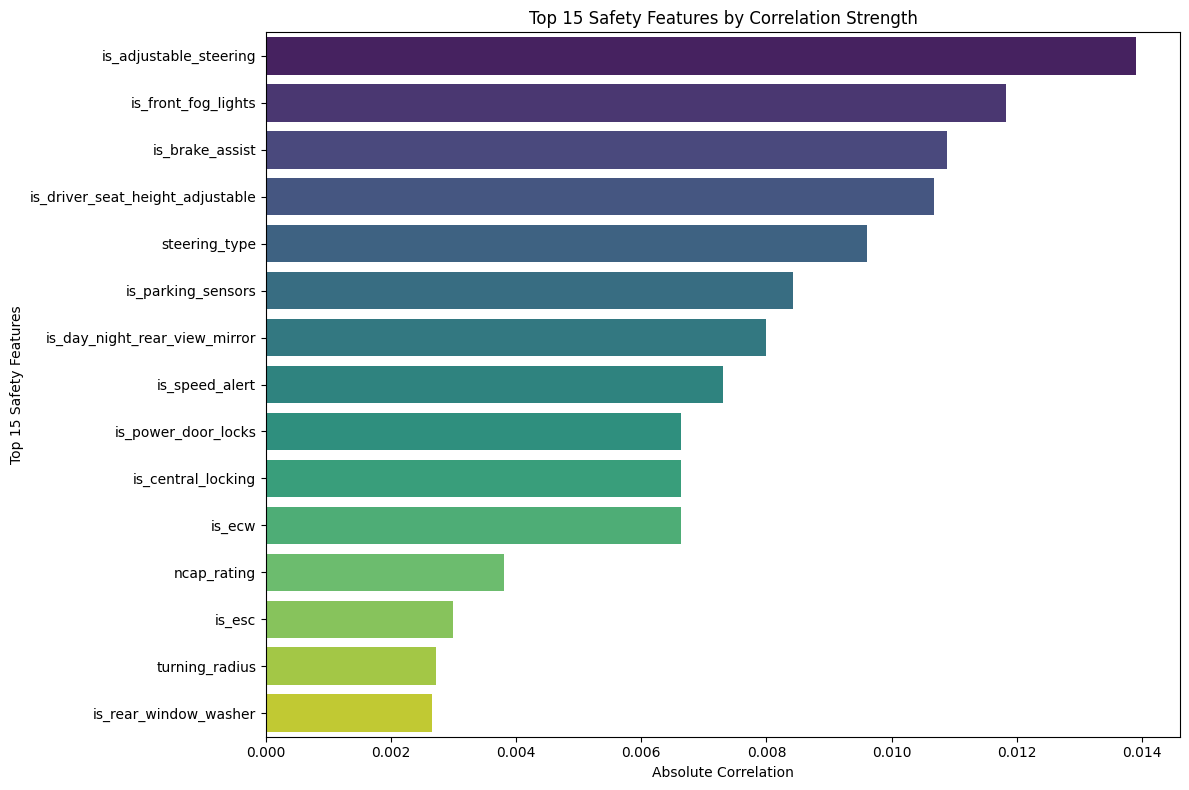

In [129]:
plt.figure(figsize=(12,8))

# First, sort the weights by correlation strength
weights_sorted = weights.sort_values(key=lambda x: x.apply(lambda y: y['correlation']), ascending=False)

# Extract correlation values from the TOP 15 (now sorted)
correlation_values = [weights_sorted[feature]['correlation'] for feature in weights_sorted.index[:15]]
feature_names = weights_sorted.index[:15]

sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")
plt.xlabel("Absolute Correlation")
plt.ylabel("Top 15 Safety Features")
plt.title("Top 15 Safety Features by Correlation Strength")
plt.tight_layout()
plt.show()

C:\Users\yagoc\AppData\Local\Temp\ipykernel_35828\516493381.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")


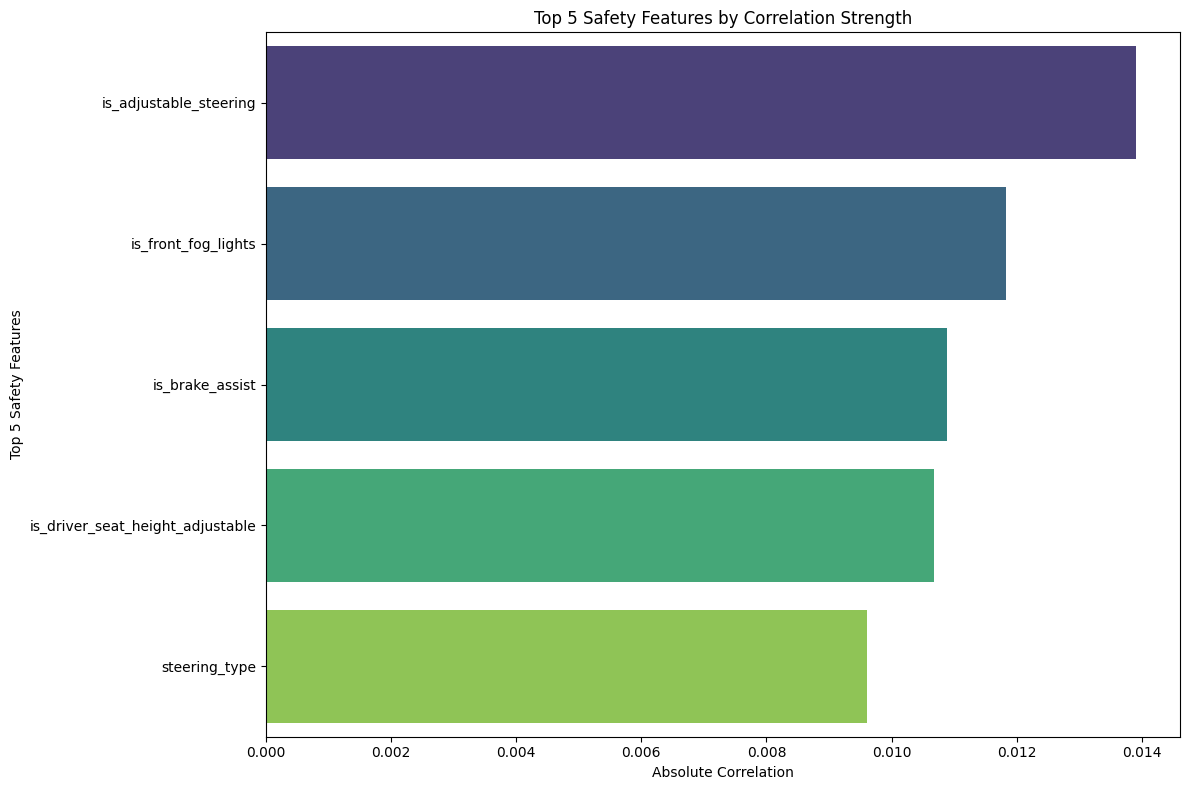

In [130]:
plt.figure(figsize=(12,8))

# First, sort the weights by correlation strength
weights_sorted = weights.sort_values(key=lambda x: x.apply(lambda y: y['correlation']), ascending=False)

# Extract correlation values from the TOP 15 (now sorted)
correlation_values = [weights_sorted[feature]['correlation'] for feature in weights_sorted.index[:5]]
feature_names = weights_sorted.index[:5]

sns.barplot(x=[abs(val) for val in correlation_values], y=feature_names, palette="viridis")
plt.xlabel("Absolute Correlation")
plt.ylabel("Top 5 Safety Features")
plt.title("Top 5 Safety Features by Correlation Strength")
plt.tight_layout()
plt.show()

# I want to check which of all the features are the ones affecting the most the claim status

### I sepparate all columns in two axis X(all features) and y(the claim status)

In [118]:

columns_to_remove = ['policy_id', 'claim_status']
X = df.drop(columns=columns_to_remove)
y = df['claim_status']

### Also separate the categorical and numerical columns to encode the categorical and get all numerical

In [119]:
# Separate categorical and numerical features from X
cat_all = X.select_dtypes(exclude="number")
num_all = X.select_dtypes(include="number")


In [120]:
display(cat_all)

,region_code,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C8,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
1,C2,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,No,Yes,No,...,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,C8,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
3,C10,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
4,C13,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,No,Yes,No,...,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C5,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
58588,C3,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
58589,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


## With LabelEncoder we encode all categorical features

In [121]:
from sklearn.preprocessing import LabelEncoder

# This will give you the SAME number of columns as original
for col in cat_all.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [122]:
X

,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,...,is_speed_alert_binary,is_front_fog_lights_binary,is_rear_window_wiper_binary,is_rear_window_washer_binary,is_rear_window_defogger_binary,is_power_door_locks_binary,is_central_locking_binary,is_power_steering_binary,is_driver_seat_height_adjustable_binary,is_day_night_rear_view_mirror_binary
0,9.3,1.2,41,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
1,8.2,1.8,35,11,27003,3,10,1,2,8,...,1,1,0,0,1,1,1,1,1,1
2,9.5,0.2,44,20,8794,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
3,5.2,0.4,44,1,73430,0,0,0,5,2,...,1,0,0,0,0,0,0,1,0,0
4,10.1,1.0,56,4,5410,2,6,1,3,7,...,1,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,10.6,2.6,48,17,34738,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1
58588,2.3,2.2,37,15,4076,4,5,1,4,0,...,1,1,1,1,1,1,1,1,1,0
58589,6.6,2.2,35,20,8794,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1
58590,4.1,3.6,44,20,8794,2,7,2,0,6,...,1,1,0,0,0,1,1,1,1,1


In [123]:
y

0        0
1        0
2        0
3        0
4        0
        ..
58587    0
58588    0
58589    0
58590    0
58591    0
Name: claim_status, Length: 58592, dtype: int64

## We will calculate the correlations between X and y

In [124]:
from scipy import stats

# Calculate correlation AND p-values

feature_analysis = {}
for column in X.columns:
    corr, p_val = stats.pearsonr(X[column], y)
    feature_analysis[column] = {
        'correlation': corr,
        'abs_correlation': abs(corr),
        'p_value': p_val,
        'significant': p_val < 0.05
    }

# Convert to DataFrame for easier viewing
results_df = pd.DataFrame(feature_analysis).T
results_df = results_df.sort_values('abs_correlation', ascending=False)

print(results_df)

                                        correlation abs_correlation   p_value  \
subscription_length                        0.078738        0.078738       0.0   
vehicle_age                               -0.028172        0.028172       0.0   
customer_age                               0.022234        0.022234       0.0   
region_density                            -0.017808        0.017808  0.000016   
max_torque                                 -0.01439         0.01439  0.000495   
is_adjustable_steering_binary              0.013917        0.013917  0.000755   
is_adjustable_steering                     0.013917        0.013917  0.000755   
cylinder                                   0.013434        0.013434  0.001147   
is_front_fog_lights_binary                 0.011825        0.011825  0.004205   
is_front_fog_lights                        0.011825        0.011825  0.004205   
is_brake_assist_binary                     0.010893        0.010893   0.00837   
is_brake_assist             

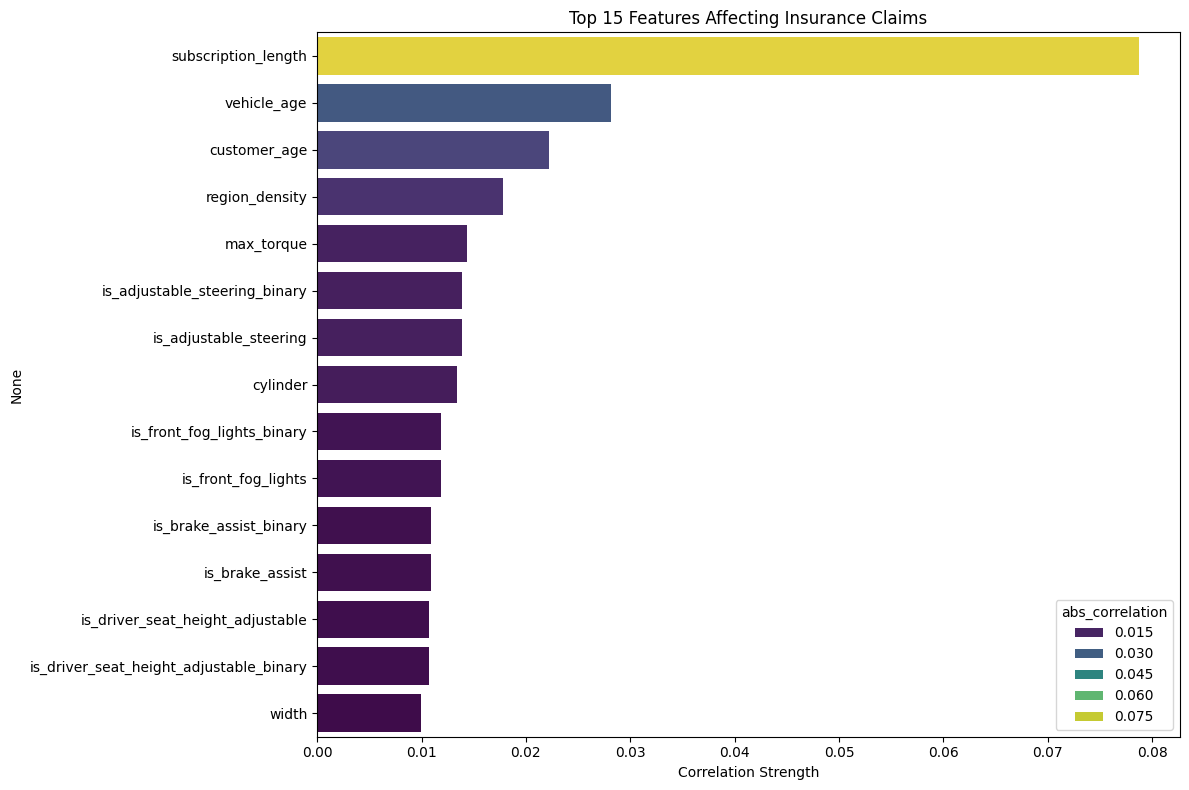

In [125]:
plt.figure(figsize=(12, 8))

top_features = results_df.head(15)
sns.barplot(x=top_features['abs_correlation'], y=top_features.index, hue=top_features['abs_correlation'], palette='viridis')
plt.xlabel('Correlation Strength')
plt.title('Top 15 Features Affecting Insurance Claims')
plt.tight_layout()
plt.show()

## Final Analysis: Which features affect claim status the most?

Now we calculate correlation between each feature and claim_status to rank them by importance.